Conteúdo
========


[Tipos de dados](material.ipynb#tipos_de_dados)

[Variáveis](material.ipynb#variaveis)

[Expressões](material.ipynb#expressoes)

[Funções](material.ipynb#funcoes)

[Execução Condicional](material.ipynb#execucao_condicional)

[Execução Iterativa](material.ipynb#execucao_iterativa)

[Recursão](material.ipynb#recursao)

[Strings](material.ipynb#strings)

[Listas](material.ipynb#listas)

[Dicionários](material.ipynb#dicionarios)

[Bibliotecas](material.ipynb#bibliotecas)

[Arquivos](material.ipynb#arquivos)

<a id='tipos_de_dados'></a>


Tipos de dados
--------------


Dados são representados por um conjunto de bytes em memória, mas o que de fato é representado depende de como aqueles bytes são interpretados.

A esta interpretação dos dados da memória é dado o nome de Tipo.

O tipo pode ser fundamental, quando é implementado físicamente pelo hardware, ou pode ser derivado, onde são construídas estruturas de dados ou classes para representar algo mais complexo.

Os tipos fundamentais de dados no Python são byte, inteiros (int), números reais (float) e referências para objetos (em C, são equivalentes aos ponteiros).

Todos os outros [tipos de dados distribuídos junto com o Python](https://docs.python.org/3/library/datatypes.html), como as comumente utilizadas listas, dicionários e strings são tipos derivados de dados, construídos a partir dos tipos fundamentais.

Vejamos exemplos destes tipos de dados.

Primeiro um número inteiro, utilizado para contagens.

In [45]:
type(1)

int

Agora um número real, utilizado para cálculos.

In [46]:
type(1.0)

float

Desta vez, um byte, unidade fundamental de dados de um computador moderno.

In [47]:
type(b'0xF') # notação hexadecimal

bytes

Agora uma referência. Se copiamos uma lista `a` contendo um número para a lista `b`, faz sentido que ambas as listas sejam idênticas.

In [48]:
a = [1]
b = a
a == b

True

Mas criarmos um nova lista `c` com o mesmo valor 1, mudarmos o valor na lista `a`, temos um resultado inesperado quando comparamos `b` e `c`.

In [49]:
c = [1]
a[0] = 2
b == c

False

Isso se deve porque `b` e `a` fazem referência a exatamente a mesma lista, portanto modificar o conteúdo de `a` implica em modificar o conteúdo de `b`. De fato, podemos observar isto imprimindo os conteúdos.

In [50]:
print("a:", a)
print("b:", b)
print("c:", c)

a: [2]
b: [2]
c: [1]


<a id='variaveis'></a>


Variáveis
---------

Variáveis são espaços de memória nomeados que permitem a organização de um programa através de mnemônicos (nomes fáceis de se lembrar ou raciocinar).

Espaços de memória guardam diferentes tipos de dados, cada um com seu tipo específico de representação de alguma coisa abstrata, como por exemplo números inteiros utilizados para contagem, números reais (`float`) para representação de operações matemáticas, booleanos para representações de operações lógicas, strings (`str`) para representação de conjuntos de caracteres, dentre outros tipos de dados básicos e tipos de dados mais complexos criados por meio de estruturas de dados e classes (programação orientada à objetos).

Vejamos exemplos de variáveis:

In [51]:
inteiro = 8
inteiro_2 = 3
resultado_divisao = inteiro//inteiro_2
resto_divisao = inteiro%inteiro_2
print("Resultado da divisão inteira:", resultado_divisao)
print("Resto da divisão inteira:", resto_divisao)

Resultado da divisão inteira: 2
Resto da divisão inteira: 2


In [52]:
real = 3.14159
real_2 = 2.11
resultado_divisao = real/real_2
print("Resultado da divisão real:", resultado_divisao)

Resultado da divisão real: 1.4889052132701421


In [53]:
print(f"Entradas\t\tSaídas")
print(f"A\tB\tA&B\tA|B\tA^B")
for a in [False, True]:
    for b in [False, True]:
        print(f"{a}\t{b}\t{a&b}\t{a|b}\t{a^b}")

Entradas		Saídas
A	B	A&B	A|B	A^B
False	False	False	False	False
False	True	False	True	True
True	False	False	True	True
True	True	True	True	False


Variáveis também podem guardar múltiplos valores, permitindo que um programa escale com o tamanho de sua entrada.

Por exemplo, ao invés de declararmos 10 variáveis unitárias, podemos declarar uma única variável com 10 valores. Os valores podem então ser endereçados através do seu índice.

In [54]:
lista_de_valores = ["teste1", "teste2", "teste3"]

for i in range(len(lista_de_valores)):
    print(f"Acessando índice i={i} de lista_de_valores: {lista_de_valores[i]}")

Acessando índice i=0 de lista_de_valores: teste1
Acessando índice i=1 de lista_de_valores: teste2
Acessando índice i=2 de lista_de_valores: teste3


Um exemplo apresentado em aula foi o do cálculo de determinantes de matriz.

Assuma a matriz 3 por 3 abaixo.

In [55]:
# colunas  0  1  2
matriz = [[1, 2, 3], # linha 0
          [5, 4, 3], # linha 1
          [2, 1 ,9]  # linha 2
          ]
#matriz[0] = [1, 2, 3]
#matriz[0][2] = 3

Podemos calcular a determinante facilmente reproduzindo as equações encontradas manualmente.

In [56]:
from copy import deepcopy

def determinante_matriz_fixo3x3(matriz):
    matriz_expandida = deepcopy(matriz)
    # Extende matriz copiando duas primeiras colunas para o fim
    for indice_linha in range(len(matriz)):
        matriz_expandida[indice_linha].extend(matriz_expandida[indice_linha][0:2])
    
    # Calcula diagonais positivas
    dp0 = matriz_expandida[0][0]*matriz_expandida[1][1]*matriz_expandida[2][2]
    dp1 = matriz_expandida[0][1]*matriz_expandida[1][2]*matriz_expandida[2][3]
    dp2 = matriz_expandida[0][2]*matriz_expandida[1][3]*matriz_expandida[2][4]

    # Calcula diagonais negativas
    dn0 = matriz_expandida[0][2] * matriz_expandida[1][1] * matriz_expandida[2][0]
    dn1 = matriz_expandida[0][3] * matriz_expandida[1][2] * matriz_expandida[2][1]
    dn2 = matriz_expandida[0][4] * matriz_expandida[1][3] * matriz_expandida[2][2]
    
    # Soma diagonais parciais e retorna o valor
    return dp0+dp1+dp2-dn0-dn1-dn2

print(determinante_matriz_fixo3x3(matriz))

-54


Mas esta solução tem um problema. Só funciona para matrizes de 3 por 3. 

Como fazer ser mais genérico? De maneira paramétrica.

In [57]:
def determinante_matriz_parametrica(matriz):
    matriz_expandida = deepcopy(matriz)
    # Expande a matriz
    for indice_linha in range(len(matriz)):
        matriz_expandida[indice_linha].extend(matriz_expandida[indice_linha][0:len(matriz)-1])
    
    # Calcula diagonais positivas
    determinante_final = 0
    for determinante_positivo in range(len(matriz)):
        determinante_parcial = 1
        for linha in range(len(matriz)):
            coluna = linha + determinante_positivo
            determinante_parcial *= matriz_expandida[linha][coluna]
        determinante_final += determinante_parcial
        
    # Calcula diagonais negativas
    for determinante_negativo in range(len(matriz)):
        determinante_parcial = 1
        for linha in range(len(matriz_expandida)):
            coluna = -linha-1-determinante_negativo
            determinante_parcial *= matriz_expandida[linha][coluna]
        determinante_final -= determinante_parcial
        
    # Retorna determinante
    return determinante_final

print(determinante_matriz_parametrica(matriz))

-54


Agora podemos calcular a determinante de matrizes 5x5, por exemplo.

In [58]:
matriz_5x5 = [
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [5, 6, 7, 8, 9],
]
print(determinante_matriz_parametrica(matriz_5x5))

0


<a id='expressoes'></a>

Expressões
----------------

Uma expressão é um conjunto de operadores e operandos que tem como o objetivo se alcançar algum resultado. Existem vários tipos de expressões, como por exemplo as expressões matemáticas, as expressões booleanas e as expressões para manipulação de conjuntos, ou outras estruturas de dados.

Vejamos alguns exemplos de expressões.

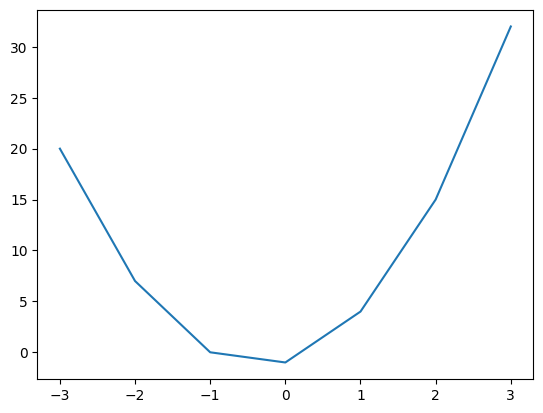

In [59]:
# Importamos a biblioteca matplotlib para plotagem
import matplotlib.pyplot as plt

# Função quadrática gera uma parábola
def quadratica(x, a, b, c):
    return x*x*a + x*b + c

xs = [-3, -2, -1, 0, 1, 2, 3]
ys = []
a = 3
b = 2
c = -1
for x in xs:
    # Calculamos o valor do eixo Y de cada ponto X
    # e guardamos os resultados para conferência da parábola
    y = quadratica(x, a, b, c)
    ys.append(y)

# Plotamos coordenadas nos eixos X e Y
plt.plot(xs, ys)
plt.show()

Como podemos ver, nossa expressão matemática de fato representa uma função quadrática com concavidade para cima.

Agora vamos testar a função quadrática com concavidade para baixo, alterando a constante da parábola `a`.

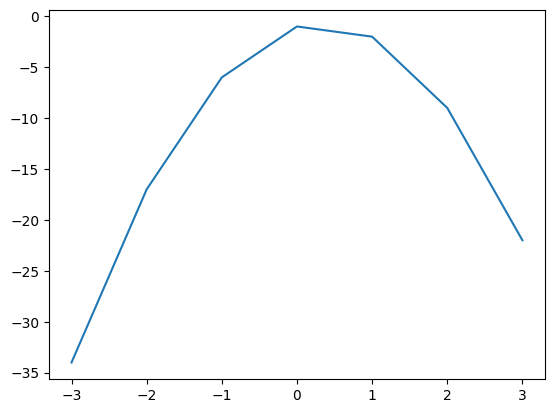

In [60]:
xs = [-3, -2, -1, 0, 1, 2, 3]
ys = []
a = -3
b = 2
c = -1
for x in xs:
    y = quadratica(x, a, b, c)
    ys.append(y)

plt.plot(xs, ys)
plt.show()

Como se pode observar, a concavidade da parábola de fato está voltada para baixo.

Agora veremos expressões lógicas/booleanas.

In [61]:
print(f"Entradas\tSaídas")
print(f"A\tB\tS")
for a in [False, True]:
    for b in [False, True]:
        if (a&b) + (a|b) + (a^b):
            print(f"{a}\t{b}\t{True}")
        else:
            print(f"{a}\t{b}\t{False}")

Entradas	Saídas
A	B	S
False	False	False
False	True	True
True	False	True
True	True	True


Como vimos acima, a parte da expressão booleana foi dominada pelo componente lógico OU (OR).
Agora veremos o comportamente substituindo a operação de soma `+` pela multiplicação `*`.

In [62]:
print(f"Entradas\tSaídas")
print(f"A\tB\tS")
for a in [False, True]:
    for b in [False, True]:
        if (a&b) * (a|b) * (a^b):
            print(f"{a}\t{b}\t{True}")
        else:
            print(f"{a}\t{b}\t{False}")

Entradas	Saídas
A	B	S
False	False	False
False	True	False
True	False	False
True	True	False


Todas as saídas serão falsas devido ao fato de ou a porta lógica E (AND) puxar os valores para zero quando as entradas não são simultâneamente verdadeiras, e a porta OU-EXCLUSIVO (XOR) puxa os valores para zero quando as entradas são simultâneamente verdadeiras.

Outros tipos de expressões são utilizadas para manipulação de conjuntos.

Vejamos exemplos utilizando strings (que são conjuntos de caracteres).

In [63]:
string = "QUALQUER COISA"
print(string[:10])

QUALQUER C


Como podemos ver, o operador `[:x]` selecionou os `x` primeiros elementos da string. 

Isto também é válido para listas e tuplas, que veremos adiante.

In [64]:
print(string[:10]+string[11:])

QUALQUER CISA


Agora, note que foi omitida a letra `o`, que se encontra na 11ª posição (índice 10 da string).

Isto foi feito a partir de duas operações.

A primeira pegando as 10 primeiras letras e a segunda pegando todas as letras após a décima segunda letra (índice 11).

In [65]:
print(string[-10:-1])

QUER COIS


Também podemos acessar os valores da string utilizando índices negativos, que começam a sua contagem de maneira regressiva, onde o último elemento da string é endereçado pelo índice `-1` e o primeiro elemento da string é endereçado pelo índice `-len(string)-1`.

In [66]:
print(f"Número de caracteres na string: {len(string)}")
print(string[-15:])
print(string[:14])

Número de caracteres na string: 14
QUALQUER COISA
QUALQUER COISA


Com o conjunto de variáveis e expressões, podemos definir uma série de instruções para implementar uma lógica de programa desejada.

Porém, a complexidade do programa gerado é limitado pelo seu tamanho. Quanto maior um programa, tipicamente menos manutenível ele é, dificultando modificações, reparos e melhorias.

Exatamente para se mitigar este problema, são criadas as funções.

<a id='funcoes'></a>

Funções
-------

Seu o objetivo é encapsular uma lógica frequentemente utilizada, que pode ser chamada em qualquer ponto do programa, ao invés de ser copiada na íntegra em cada ponto de uso.

Já vimos exemplos de funções anteriormente, como as que executaram os cálculos das determinantes das matrizes, ou a que implementou a função quadrática.

Porém façamos uma nova função.

Desta vez, uma função que calcula Pi através do método de Monte Carlo.

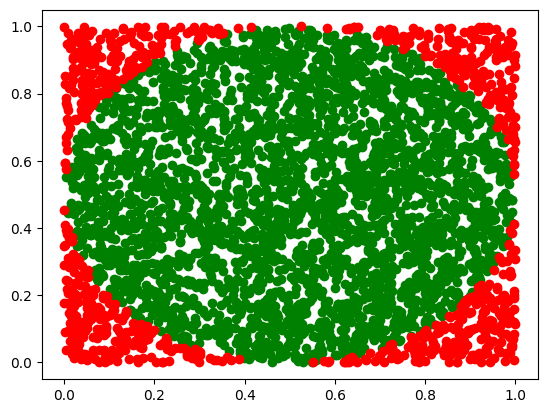

3.116

In [67]:
def estima_pi_monte_carlo(iteracoes=4000, silencioso=True, plota_figura=False):
    import random # importa biblioteca de números aleatórios

    estimativa_pi = 0 # declara variável para guardar o resultado da computação
    dentro_do_circulo = 0 # conta número de coordenadas dentro do círculo
    coordenadas_no_circulo = [[], []]
    coordenadas_fora_do_circulo = [[], []]
    for i in range(iteracoes):
        # estima o valor de Pi sorteando coordenadas dentro de um quadrado [0,1]
        x = random.random()
        y = random.random()
        # calcula distância euclidiana do ponto até o centro [0.5, 0.5]
        d = ((x-0.5)**2 + (y-0.5)**2)**0.5
        # se a coordenada cair dentro do círculo, contabilize
        if d <= 0.5:
            dentro_do_circulo += 1
            coordenadas_no_circulo[0].append(x)
            coordenadas_no_circulo[1].append(y)
        # se cair fora, não faz nada e continua para a próxima iteração i = i+1
        else:
            coordenadas_fora_do_circulo[0].append(x)
            coordenadas_fora_do_circulo[1].append(y)
            pass

        # imprime a cada 10 iterações
        if i % 200 == 0 and not silencioso:
            # número de pontos que caem dentro do círculo tem que ser 
            # proporcional à área do círculo em relação à do quadrado
            # Acirc = pi*(raio**2) = pi*0.25 ou pi/4
            # Aquad = 1*1 = 1
            print("Estimativa de pi para %d:%f" % (i, 4*dentro_do_circulo/iteracoes))
    if plota_figura:
        plt.scatter(coordenadas_no_circulo[0], coordenadas_no_circulo[1], color="green")
        plt.scatter(coordenadas_fora_do_circulo[0],
                    coordenadas_fora_do_circulo[1],
                    color="red")
        plt.show()
    return 4*dentro_do_circulo/iteracoes

estima_pi_monte_carlo(plota_figura=True)

Mas eu havia dito que o objetivo era justamente evitar a repetição do código. Neste caso só chamamos uma vez. 

Que tal variarmos o número de iterações e vermos o comportamento da estimativa?

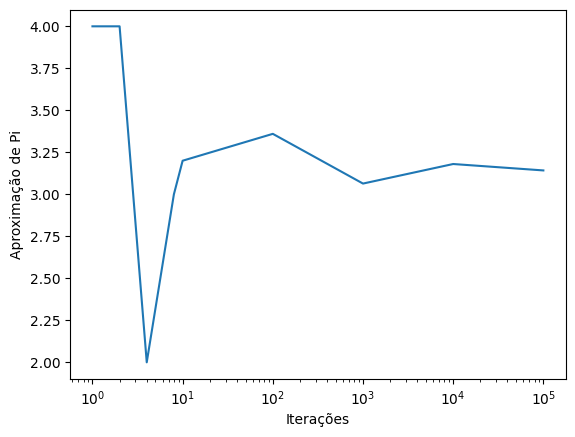

In [68]:
xs = [1, 2, 4, 8, 10, 100, 1000, 10000, 100000]
ys = []
for iteracoes in xs:
    ys.append(estima_pi_monte_carlo(iteracoes))
plt.xscale("log")
plt.xlabel("Iterações")
plt.ylabel("Aproximação de Pi")
plt.plot(xs, ys)
plt.show()

Vimos como após um dado número de iterações, o valor da aproximação se estabiliza.

Mas perceba que a peça fundamental da função é um laço de repetição do tipo `for`, já que precisamos sortear um número grande de coordenadas.

<a id='execucao_iterativa'></a>

Execução iterativa
--------------------------

As estruturas de repetição permitem que um mesmo bloco de código seja iterado/repetido diversas vezes, seja para a mesma entrada ou diferentes entradas. No Python, estas estruturas se apresentam na forma um `for` ou um `while`. O `for` é indicado para os casos onde o tamanho da entrada é conhecida, enquanto o `while` quando o tamanho da entrada é incerto.

Vimos este efeito tanto na estimativa de Pi pelo método de Monte Carlo quanto no cálculo de determinantes paramétrico, em que podemos calcular a determinante de uma matriz quadrada de tamanho arbitrário, impraticável de ser feito quando se calculam manualmente cada uma das diagonais da matriz.

Veremos um outro uso a seguir na inversão de strings.

In [69]:
def inverte_string(entrada):
    # Versão picareta
    # return "".join(list(reversed(entrada)))

    # Versão legítima
    temporario = ""
    for i in range(len(entrada)): # tamanho da entrada é fixo e conhecido em tempo de execução
        print(f"Iteração {i+1}/{len(entrada)}: temporario = '{temporario}'")
        temporario += entrada[-1-i]
    return temporario

print(f"String original:{string}")
print(f"String invertida:{inverte_string(string)}")

String original:QUALQUER COISA
Iteração 1/14: temporario = ''
Iteração 2/14: temporario = 'A'
Iteração 3/14: temporario = 'AS'
Iteração 4/14: temporario = 'ASI'
Iteração 5/14: temporario = 'ASIO'
Iteração 6/14: temporario = 'ASIOC'
Iteração 7/14: temporario = 'ASIOC '
Iteração 8/14: temporario = 'ASIOC R'
Iteração 9/14: temporario = 'ASIOC RE'
Iteração 10/14: temporario = 'ASIOC REU'
Iteração 11/14: temporario = 'ASIOC REUQ'
Iteração 12/14: temporario = 'ASIOC REUQL'
Iteração 13/14: temporario = 'ASIOC REUQLA'
Iteração 14/14: temporario = 'ASIOC REUQLAU'
String invertida:ASIOC REUQLAUQ


Outro exemplo comum é o cálculo do fatorial de um número (`x!`).

In [70]:
def fatorial(x):
    fat = 1
    for i in range(1, x+1):
        fat *= i
    return fat

for i in range(10):
    print(fatorial(i))

1
1
2
6
24
120
720
5040
40320
362880


Em conjunto com estruturas de repetição, tipicamente temos estruturas que permitem a execução condicional de um bloco de código.

<a id='execucao_condicional'></a>

Execução condicional
--------------------------------

Expressões lógicas booleanas podem ser utilizadas para se controlar o fluxo de execução, ou o caminho que o programa executa.

No Python, estas estruturas se dão por meio das palavras reservadas `if`, `else` e `elif`.

Estas estruturas já foram utilizadas previamente nos exemplos, como no caso do cálculo da estimativa de Pi, onde precisamos checar se a coordenada cai ou não dentro do círculo trigonométrico.

In [71]:
def cai_dentro_do_circulo_trigonometrico(x,y):
    # calcula distância euclidiana do ponto até o centro [0.5, 0.5]
    d = ((x-0.5)**2 + (y-0.5)**2)**0.5
    # se a coordenada cair dentro do círculo, retorna verdadeiro
    if d <= 0.5:
        return True
    # caso contrário, retorna falso
    else:
        return False

Outro exemplo de instruções para o cálculo da série de Taylor.

O cosseno pode ser aproximado pela seguinte série: 

$cos(x) = 1-\frac{x^{2}}{2!}+\frac{x^{4}}{4!}-\frac{x^{6}}{6!}+\frac{x^{8}}{8!}-\frac{x^{10}}{10!}+...$

Que pode ser reescrito como

$cos(x) = 1-\sum^{iteracoes_{max}}_{n=0}{\frac{(-1)^{n}x^{2n}}{2n!}}$

Daí podemos tirar que existem dois padrões. Potências e fatoriais pares, com sinais alternando entre positivo e negativo.

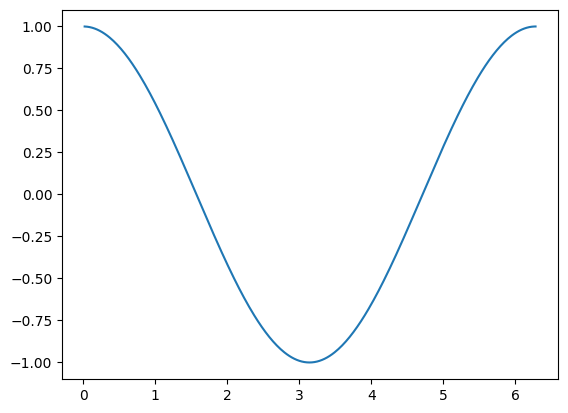

In [72]:
def cosseno_de_taylor(x, iteracoes=20):
    estimativa_cosseno = 1
    sinalPositivo = False
    for i in range(1, iteracoes+1):
        # Calcula potência de X dividido pelo fatorial
        componente = (x**(2*i))/fatorial(2*i)
        # Alterna sinal
        if sinalPositivo:
            estimativa_cosseno += componente
        else:
            estimativa_cosseno -= componente
        sinalPositivo = not sinalPositivo
    return estimativa_cosseno

import math
xs = [i*math.pi/180 for i in range(1, 361)]
ys = []
for x in xs:
    ys.append(cosseno_de_taylor(x))

plt.plot(xs, ys)
plt.show()

Agora façamos a série de Taylor para o seno

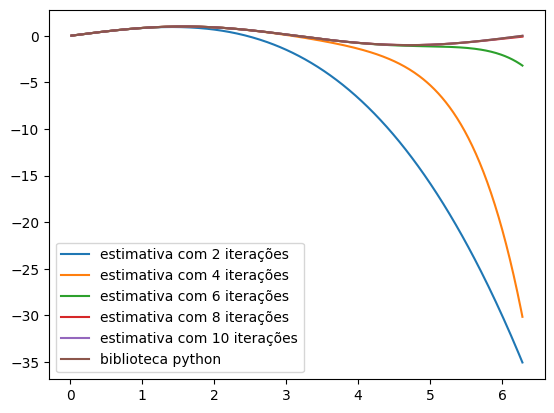

In [73]:
def seno_de_taylor(x, iteracoes=7):
    estimativa_seno = 0
    sinalPositivo = True
    for i in range(0, iteracoes):
        componente = (x**(2*i+1))/fatorial(2*i+1)
        if sinalPositivo:
            estimativa_seno += componente
        else:
            estimativa_seno -= componente
        sinalPositivo = not sinalPositivo
    return estimativa_seno

import math
xs = [i*math.pi/180 for i in range(1, 361)]
# Precalcula os valores do eixo Y gerado pelo próprio Python
ys_biblioteca = [math.sin(x) for x in xs]

# Altera o número de iterações da nossa série de Taylor para ver o impacto na precisão
for iteracoes in [2, 4, 6, 8, 10]:
    ys = []
    for x in xs:
        ys.append(seno_de_taylor(x, iteracoes))
    plt.plot(xs, ys, label=f"estimativa com {iteracoes} iterações")
plt.plot(xs, ys_biblioteca, label="biblioteca python")
plt.legend()
plt.show()

Mas esta não é a única forma de se calcular as funções trigonométricas. Podemos utilizar, por exemplo, uma série de Chebyshev.

Neste caso não temos execução condicional nem iterativa, não podendo alterar o número de iterações para reduzir ou aumentar a precisão do cálculo em troca de tempo de computação.

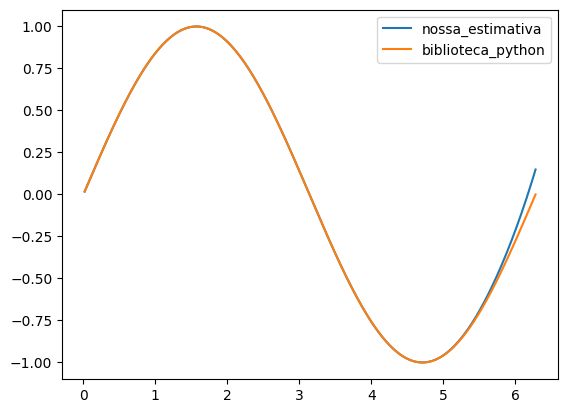

In [74]:
def seno_chebyshev(x):
    coeficientes_chebyshev = [
        -0.10132118,
        0.0066208798,
        -0.00017350505,
        0.0000025222919,
        -0.00000002337787,
        0.00000000013291342
    ]
    pi = 3.1415927
    pi_menor = -0.00000008742278
    x2 = x*x
    p11 = coeficientes_chebyshev[5]
    p09 = p11*x2 + coeficientes_chebyshev[4]
    p07 = p09*x2 + coeficientes_chebyshev[3]
    p05 = p07*x2 + coeficientes_chebyshev[2]
    p03 = p05*x2 + coeficientes_chebyshev[1]
    p01 = p03*x2 + coeficientes_chebyshev[0]
    estimativa_seno = (x-pi-pi_menor)*(x+pi+pi_menor)*p01*x
    return estimativa_seno


import math

xs = [i * math.pi / 180 for i in range(1, 361)]
ys = []
ys_biblioteca = []
for x in xs:
    ys.append(seno_chebyshev(x))
    ys_biblioteca.append(math.sin(x))

plt.plot(xs, ys, label="nossa_estimativa")
plt.plot(xs, ys_biblioteca, label="biblioteca_python")
plt.legend()
plt.show()

<a id='recursao'></a>

Recursão
-------------

Recursão é feita de funções que chamam a si mesmas. Estas funções devem ter uma condição de parada, senão se chamarão de maneira descontrolada, causando falha de segmentação do programa. Além da condição de parada, deve haver um caso de base, que é o caso comumente encontrado.

Um clássico exemplo é o do fatorial. Vejamos a diferença com o fatorial iterativo.

In [75]:
def fatorial_iterativo(x):
    fat = 1
    for i in range(1, x+1):
        fat *= i
    return fat

def fatorial_recursivo(x):
    # caso de parada
    if x <= 1: 
        return 1
    return x*fatorial_recursivo(x-1)

print([fatorial_iterativo(x) for x in range(10)])
print([fatorial_recursivo(x) for x in range(10)])

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


Como podemos ver, o resultado é exatamente o mesmo, porém na versão iterativa temos um laço `for` explícito.

Enquanto isso, a versão recursiva se comporta como um `for`, porém de maneira escamoteada.

Imprimâmos um contador para confirmar este fato.

In [76]:
def contador_iterativo(x):
    for i in range(x):
        print(i, end=" ")

contador_iterativo(10)

0 1 2 3 4 5 6 7 8 9 

In [77]:
def contador_recursivo(x, cont=0):
    # caso de parada
    if x <= 0:
        return
    print(cont, end=" ")
    contador_recursivo(x-1, cont+1)
contador_recursivo(10)

0 1 2 3 4 5 6 7 8 9 

<a id='strings'></a>

Strings
-------------

<a id='listas'></a>

Listas
-------------

<a id='dicionarios'></a>

Dicionários
-------------

<a id='bibliotecas'></a>

Bibliotecas
-------------

<a id='arquivos'></a>

Arquivos
----------